# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import csv
import re
import scipy.stats as st

# Import API key
import sys
import os
key = "C:\\Users\\Kelly\\Desktop\\KEYS"
sys.path.append(key)
from OpenWeatherAPI import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


url = "http://api.openweathermap.org/data/2.5/weather?"

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name.title()
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

#I created this section to store the latitude and longitude of my cities for use later in the project.
latitude = lats.tolist()
longitude = lngs.tolist()
city_info = pd.DataFrame(list(zip(cities, latitude, longitude)), 
               columns =["City Name", "Latitude", "Longitude"]) 

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
ident = []
name = []
weather = []
clouds = []
wind = []
country = []

#for this section, I created the to_end variable to provide a countdown to the end of the loop, which I found more useful
    #than counting up as the assignment suggested. I also used an if/else statement print a final statement when the loop
    #finishes iterating.

for city in cities:
    try:
        query_url = f"{url}q={city}&units=imperial&appid={weather_api_key}"
        weather_response = requests.get(query_url).json()
        ident.append(weather_response['id'])
        name.append(weather_response['name'])
        weather.append(weather_response['main'])
        wind.append(weather_response['wind'])
        clouds.append(weather_response['clouds'])
        country.append(weather_response['sys']['country'])
        index = cities.index(city)
        to_end = (len(cities))-index-1
        if to_end == 0:
            print(f'Now processing data for {weather_response["name"]}, , a city in {weather_response["sys"]["country"]}.')
            print(f'All city data is now processed.')
        else:
            print(f'Now processing data for {weather_response["name"]}, a city in {weather_response["sys"]["country"]}. {to_end} more cities to process.')
    except:
        print(f'{city} was not found in our dataset, so we will not be collecting data for this city.')

Now processing data for Barrow, a city in US. 622 more cities to process.
Now processing data for Ugoofaaru, a city in MV. 621 more cities to process.
Now processing data for Honiara, a city in SB. 620 more cities to process.
Now processing data for Lagoa, a city in PT. 619 more cities to process.
Attawapiskat was not found in our dataset, so we will not be collecting data for this city.
Now processing data for Itaberá, a city in BR. 617 more cities to process.
Now processing data for Mataura, a city in NZ. 616 more cities to process.
Now processing data for Longyearbyen, a city in SJ. 615 more cities to process.
Now processing data for Tautira, a city in PF. 614 more cities to process.
Now processing data for Santa Marta, a city in CO. 613 more cities to process.
Now processing data for Kinsale, a city in IE. 612 more cities to process.
Now processing data for Koslan, a city in RU. 611 more cities to process.
Now processing data for Emmett, a city in US. 610 more cities to process.
No

Now processing data for Tucumcari, a city in US. 517 more cities to process.
Now processing data for Ahipara, a city in NZ. 516 more cities to process.
Now processing data for Kota Kinabalu, a city in MY. 515 more cities to process.
Now processing data for Karlivka, a city in UA. 514 more cities to process.
Now processing data for Pevek, a city in RU. 513 more cities to process.
Now processing data for Port Alfred, a city in ZA. 512 more cities to process.
Now processing data for Castro, a city in BR. 511 more cities to process.
Now processing data for Omsukchan, a city in RU. 510 more cities to process.
Now processing data for Arman', a city in RU. 509 more cities to process.
Now processing data for Fenton, a city in US. 508 more cities to process.
Now processing data for Freetown, a city in SL. 507 more cities to process.
Now processing data for Tasiilaq, a city in GL. 506 more cities to process.
Now processing data for Ibrā’, a city in OM. 505 more cities to process.
Now processing 

Now processing data for Madang, a city in PG. 411 more cities to process.
Now processing data for Broome, a city in US. 410 more cities to process.
Now processing data for Yulara, a city in AU. 409 more cities to process.
Now processing data for Torbay, a city in CA. 408 more cities to process.
Now processing data for Sankt Valentin, a city in AT. 407 more cities to process.
Now processing data for Bandiagara, a city in ML. 406 more cities to process.
Himora was not found in our dataset, so we will not be collecting data for this city.
Now processing data for Stornoway, a city in GB. 404 more cities to process.
Now processing data for Kisangani, a city in CD. 403 more cities to process.
Now processing data for Faanui, a city in PF. 402 more cities to process.
Now processing data for Yerofey Pavlovich, a city in RU. 401 more cities to process.
Now processing data for Lebu, a city in CL. 400 more cities to process.
Now processing data for Pucallpa, a city in PE. 399 more cities to proces

Now processing data for Newcastleton, a city in GB. 305 more cities to process.
Now processing data for Soavinandriana, a city in MG. 304 more cities to process.
Samusu was not found in our dataset, so we will not be collecting data for this city.
Now processing data for Southbridge, a city in US. 302 more cities to process.
Now processing data for Negara, a city in ID. 301 more cities to process.
Ruatoria was not found in our dataset, so we will not be collecting data for this city.
Now processing data for Muscat, a city in OM. 299 more cities to process.
Now processing data for Butaritari, a city in KI. 298 more cities to process.
Now processing data for Cabedelo, a city in BR. 297 more cities to process.
Now processing data for Levice, a city in SK. 296 more cities to process.
Now processing data for Tomatlán, a city in MX. 295 more cities to process.
Now processing data for Bellevue, a city in US. 294 more cities to process.
Now processing data for Vohibinany, a city in MG. 293 mor

Now processing data for Puerto del Rosario, a city in ES. 198 more cities to process.
Now processing data for Amapá, a city in BR. 197 more cities to process.
Now processing data for Lake Shasta, a city in US. 196 more cities to process.
Now processing data for Ecoporanga, a city in BR. 195 more cities to process.
Now processing data for Darhan, a city in MN. 194 more cities to process.
Now processing data for Kumba, a city in CM. 193 more cities to process.
Now processing data for Mount Gambier, a city in AU. 192 more cities to process.
Now processing data for Golden, a city in US. 191 more cities to process.
Utiroa was not found in our dataset, so we will not be collecting data for this city.
Now processing data for Meulaboh, a city in ID. 189 more cities to process.
Now processing data for Inongo, a city in CD. 188 more cities to process.
Mrirt was not found in our dataset, so we will not be collecting data for this city.
Now processing data for Airai, a city in TL. 186 more cities 

Tabialan was not found in our dataset, so we will not be collecting data for this city.
Now processing data for Tlacotalpan, a city in MX. 89 more cities to process.
Yomitan was not found in our dataset, so we will not be collecting data for this city.
Now processing data for Kerchevskiy, a city in RU. 87 more cities to process.
Now processing data for Saint-Félicien, a city in CA. 86 more cities to process.
Now processing data for Road Town, a city in VG. 85 more cities to process.
Now processing data for Sibolga, a city in ID. 84 more cities to process.
Now processing data for Nelson Bay, a city in AU. 83 more cities to process.
Now processing data for Wellington, a city in NZ. 82 more cities to process.
Now processing data for Espera Feliz, a city in BR. 81 more cities to process.
Now processing data for San Miguelito, a city in PA. 80 more cities to process.
Now processing data for Fare, a city in PF. 79 more cities to process.
Now processing data for Abong Mbang, a city in CM. 78 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
rows = zip(ident,name,clouds,wind,weather,country)
with open("city_data.csv", "w", encoding="utf-8") as f:
    writer = csv.writer(f)
    for row in rows:
        writer.writerow(row)

In [5]:
ugly_df = pd.read_csv('city_data.csv', header = None)
ugly_df.columns = ["City ID", "City Name", "Cloudiness", "Wind Speed", "Weather Data", "Country",]

ugly_weather_df = pd.DataFrame(ugly_df["Weather Data"].str.split(',', expand=True).values,
             columns=["Temperature", "Feels Like", "Min Temp", "Max Temp", "Barometric Pressure", "Humidity", "Sea Level", "Ground Level"])
better_df = ugly_df.join(ugly_weather_df).drop(["Weather Data"], axis =1)

better_df["Temperature"] = better_df["Temperature"].str.split().str[-1].str.replace('\W', '').replace('}','',regex=True).astype(float)
better_df["Feels Like"] = better_df["Feels Like"].str.split().str[-1].replace('}','',regex=True).astype(float)
better_df["Min Temp"] = better_df["Min Temp"].str.split().str[-1].replace('}','',regex=True).astype(float)
better_df["Max Temp"] = better_df["Max Temp"].str.split().str[-1].replace('}','',regex=True).astype(float)
better_df["Barometric Pressure"] = better_df["Barometric Pressure"].str.split().str[-1].replace('}','',regex=True).astype(float)
better_df["Humidity"] = better_df["Humidity"].str.split().str[-1].replace('}','',regex=True).astype(float)
better_df["Sea Level"] = better_df["Sea Level"].str.split().str[-1].replace('}','',regex=True).astype(float)
better_df["Ground Level"] = better_df["Ground Level"].str.split().str[-1].replace('}','',regex=True).astype(float)
better_df["Wind Speed"] = better_df["Wind Speed"].str.split().str[-1].replace('}','',regex=True).astype(float)
better_df["Cloudiness"] = better_df["Cloudiness"].str.split().str[-1].replace('}','',regex=True).astype(float)

#for some reason, while cleaning my data, the decimal in the Temperature column disappears.I can't figure out why
    #it does this, but the next line of code fixes it.

better_df['Temperature'] = ( better_df['Temperature']/100) 

better_df

,City ID,City Name,Cloudiness,Wind Speed,Country,Temperature,Feels Like,Min Temp,Max Temp,Barometric Pressure,Humidity,Sea Level,Ground Level
0,5880054,Barrow,1.0,70.0,US,0.76,-26.72,-7.60,-7.60,1026.0,69.0,NaN,NaN
1,1337619,Ugoofaaru,49.0,76.0,MV,82.08,82.69,82.08,82.08,1013.0,67.0,1013.0,1013.0
2,2108502,Honiara,40.0,340.0,SB,9.14,98.71,91.40,91.40,1003.0,75.0,NaN,NaN
3,3372964,Lagoa,100.0,233.0,PT,61.09,54.27,61.09,61.09,1015.0,76.0,1015.0,1009.0
4,3460967,Itaberá,36.0,146.0,BR,67.33,71.06,67.33,67.33,1012.0,92.0,1012.0,942.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,2037355,Fushun,0.0,250.0,CN,1.22,1.83,12.20,12.20,1035.0,39.0,NaN,NaN
556,1488903,Turukhansk,100.0,187.0,RU,15.27,-29.85,-15.27,-15.27,1026.0,88.0,1026.0,1020.0
557,538061,Kuybyshevo,67.0,356.0,RU,30.74,20.86,30.74,30.74,1022.0,96.0,1022.0,1018.0
558,2013921,Ust-Kuyga,99.0,197.0,RU,29.69,-37.35,-29.69,-29.69,1027.0,80.0,1027.0,1017.0


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#checking if any cities in my dataframe have humidty > 100%
better_df.sort_values(["Humidity"], ascending=False)


,City ID,City Name,Cloudiness,Wind Speed,Country,Temperature,Feels Like,Min Temp,Max Temp,Barometric Pressure,Humidity,Sea Level,Ground Level
116,3092472,Malbork,100.0,215.0,PL,35.69,26.28,35.01,36.00,1012.0,100.0,NaN,NaN
525,3382160,Cayenne,95.0,56.0,GF,0.77,85.95,77.00,77.00,1011.0,100.0,NaN,NaN
37,2980080,Saint-François,90.0,0.0,FR,0.41,37.72,41.00,41.00,1015.0,100.0,NaN,NaN
474,3592086,Ocós,20.0,352.0,GT,70.79,77.47,66.00,75.20,1012.0,100.0,NaN,NaN
472,4748305,Bon Air,1.0,40.0,US,28.51,21.81,26.60,30.00,1026.0,100.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,2065594,Mount Isa,75.0,120.0,AU,9.86,96.03,98.60,98.60,1005.0,23.0,NaN,NaN
190,6355222,Yulara,9.0,80.0,AU,9.68,90.16,96.80,96.80,1009.0,22.0,NaN,NaN
361,374739,Gogrial,69.0,23.0,SS,69.75,61.92,69.75,69.75,1010.0,22.0,1010.0,963.0
253,2077895,Alice Springs,88.0,140.0,AU,10.04,91.11,100.40,100.40,1008.0,13.0,NaN,NaN


In [7]:
#  Get the indices of cities that have humidity over 100%.
clean_city_data = better_df.loc[better_df['Humidity'] < 101]
clean_city_data

,City ID,City Name,Cloudiness,Wind Speed,Country,Temperature,Feels Like,Min Temp,Max Temp,Barometric Pressure,Humidity,Sea Level,Ground Level
0,5880054,Barrow,1.0,70.0,US,0.76,-26.72,-7.60,-7.60,1026.0,69.0,NaN,NaN
1,1337619,Ugoofaaru,49.0,76.0,MV,82.08,82.69,82.08,82.08,1013.0,67.0,1013.0,1013.0
2,2108502,Honiara,40.0,340.0,SB,9.14,98.71,91.40,91.40,1003.0,75.0,NaN,NaN
3,3372964,Lagoa,100.0,233.0,PT,61.09,54.27,61.09,61.09,1015.0,76.0,1015.0,1009.0
4,3460967,Itaberá,36.0,146.0,BR,67.33,71.06,67.33,67.33,1012.0,92.0,1012.0,942.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,2037355,Fushun,0.0,250.0,CN,1.22,1.83,12.20,12.20,1035.0,39.0,NaN,NaN
556,1488903,Turukhansk,100.0,187.0,RU,15.27,-29.85,-15.27,-15.27,1026.0,88.0,1026.0,1020.0
557,538061,Kuybyshevo,67.0,356.0,RU,30.74,20.86,30.74,30.74,1022.0,96.0,1022.0,1018.0
558,2013921,Ust-Kuyga,99.0,197.0,RU,29.69,-37.35,-29.69,-29.69,1027.0,80.0,1027.0,1017.0


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

#Accomplished in previous section. While the dataset I had in place at the time I wrote this code did not have any
    #cities with humidity higher than 100%, I can't guarantee that if I were to re-run the code and generate a new
    #list of cities that I wouldn't generate a city with a humidity greater than 100, so I decided to write this
    #section of code anyway.

In [9]:
# clean_city_data = clean_city_data.merge(city_info, on="City Name")
clean_city_data = pd.merge(clean_city_data, city_info,
                        how="left", on=["City Name"])
clean_city_data

,City ID,City Name,Cloudiness,Wind Speed,Country,Temperature,Feels Like,Min Temp,Max Temp,Barometric Pressure,Humidity,Sea Level,Ground Level,Latitude,Longitude
0,5880054,Barrow,1.0,70.0,US,0.76,-26.72,-7.60,-7.60,1026.0,69.0,NaN,NaN,89.562846,-162.300527
1,1337619,Ugoofaaru,49.0,76.0,MV,82.08,82.69,82.08,82.08,1013.0,67.0,1013.0,1013.0,5.914250,62.148229
2,2108502,Honiara,40.0,340.0,SB,9.14,98.71,91.40,91.40,1003.0,75.0,NaN,NaN,-10.979518,158.747830
3,3372964,Lagoa,100.0,233.0,PT,61.09,54.27,61.09,61.09,1015.0,76.0,1015.0,1009.0,47.945889,-27.492200
4,3460967,Itaberá,36.0,146.0,BR,67.33,71.06,67.33,67.33,1012.0,92.0,1012.0,942.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,2037355,Fushun,0.0,250.0,CN,1.22,1.83,12.20,12.20,1035.0,39.0,NaN,NaN,43.670723,134.349061
556,1488903,Turukhansk,100.0,187.0,RU,15.27,-29.85,-15.27,-15.27,1026.0,88.0,1026.0,1020.0,-29.647027,16.789820
557,538061,Kuybyshevo,67.0,356.0,RU,30.74,20.86,30.74,30.74,1022.0,96.0,1022.0,1018.0,-46.113180,-146.283944
558,2013921,Ust-Kuyga,99.0,197.0,RU,29.69,-37.35,-29.69,-29.69,1027.0,80.0,1027.0,1017.0,51.845297,-58.281622


In [10]:
clean_city_data.to_csv(r'..\VacationPy\clean_city_data.csv') #I added this in after completing WeatherPy so I could use my
    #cleaned dataframe in VacationPy.

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [11]:
def printcor(correlation):
    if correlation == 0:
        print(f"There is no linear relationship between the two values.")
    elif correlation == 1:
        print(f"There is a perfect positive linear relationship between the two values.")
    elif correlation == -1:
        print(f"There is a perfect negative linear relationship between the two values.")
    elif 0 < correlation < 0.3:
        print(f"There is a weak positive linear relationship between the two values.")
    elif 0 > correlation > -.3:
        print(f"There is a weak negative relationship between the two values.")
    elif .3 < correlation < .7:
        print(f"There is a moderate positive relationship between the two values.")
    elif -.3 > correlation > -.7:
        print(f"There is a moderate negative relationship between the two values.")
    elif .7 < correlation < 1:
        print(f"There is a strong positive relationship between the two values.")
    elif -.7 > correlation > -1:
        print(f"There is a strong negative relationship between the two values.")

This plot visualizes the relationship between the Latitude and Temperature of the cities represented in our dataset.
The correlation coefficient for the Latitude and Temperature for these cities is 0.04.
There is a weak positive linear relationship between the two values.


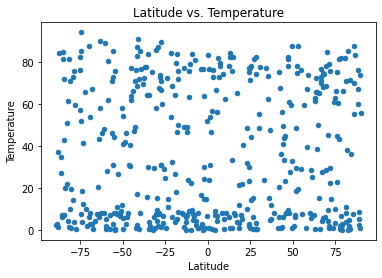

In [12]:
def scatterplot(x,y):
    clean_city_data.dropna()
    "This creates a scatterplot based on the clean_city_data csv using values x and y"
    correlation = clean_city_data[x].corr(clean_city_data[y])
    print(f"This plot visualizes the relationship between the {x} and {y} of the cities represented in our dataset.")
    print(f"The correlation coefficient for the {x} and {y} for these cities is {round(correlation,2)}.")
    clean_city_data.plot.scatter(x, y)
    plt.title(f'{x} vs. {y}')
    plt.savefig(f'WeatherPy_PNG_files/{x}_vs_{y}.png')
    printcor(correlation)
scatterplot("Latitude", "Temperature")

## Latitude vs. Humidity Plot

This plot visualizes the relationship between the Latitude and Humidity of the cities represented in our dataset.
The correlation coefficient for the Latitude and Humidity for these cities is 0.05.
There is a weak positive linear relationship between the two values.


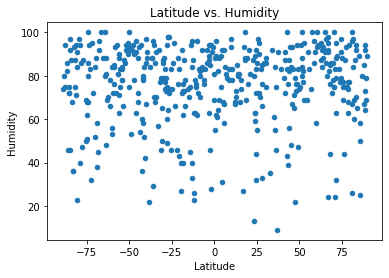

In [13]:
scatterplot("Latitude", "Humidity")

## Latitude vs. Cloudiness Plot

This plot visualizes the relationship between the Latitude and Cloudiness of the cities represented in our dataset.
The correlation coefficient for the Latitude and Cloudiness for these cities is 0.01.
There is a weak positive linear relationship between the two values.


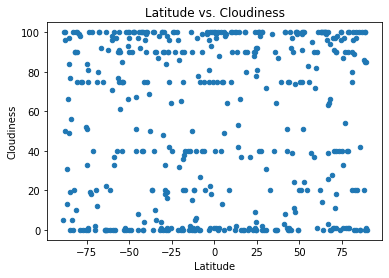

In [14]:
scatterplot("Latitude", "Cloudiness")

## Latitude vs. Wind Speed Plot

This plot visualizes the relationship between the Latitude and Wind Speed of the cities represented in our dataset.
The correlation coefficient for the Latitude and Wind Speed for these cities is 0.02.
There is a weak positive linear relationship between the two values.


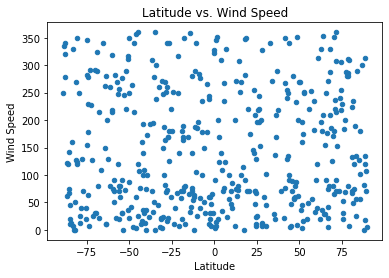

In [15]:
scatterplot("Latitude", "Wind Speed")

## Linear Regression

In [16]:
# I decided to print the length of each of these datasets to check for any significant bias between the northern and
    #southern hemispheres. This way, if the dataset is too skewed toward one or the other, I could re-run the data until
    #I get something more useful.
northern_hem = clean_city_data.loc[clean_city_data['Latitude'] > 0]
print(f'There are {len(northern_hem)} cities from the northern hemisphere in this dataset.')
southern_hem = clean_city_data.loc[clean_city_data['Latitude'] < 0]
print(f'There are {len(southern_hem)} cities from the southern hemisphere in this dataset.')

# this line was used to test whether any cities happened to
    # fall on the equator, in which case I might consider adjusting my formula. As they do not, and it's unlikely in other
    #datasets that they would, I'm comfortable leaving the data as-is and treating potential cities with a latitude of 0 as
    #outliers.
test = clean_city_data.loc[clean_city_data['Latitude'] == 0] 
test

There are 222 cities from the northern hemisphere in this dataset.
There are 233 cities from the southern hemisphere in this dataset.


,City ID,City Name,Cloudiness,Wind Speed,Country,Temperature,Feels Like,Min Temp,Max Temp,Barometric Pressure,Humidity,Sea Level,Ground Level,Latitude,Longitude


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [17]:
def nhlinregress(x,y):
    correlation = northern_hem[x].corr(clean_city_data[y])
    print(f"This plot visualizes the relationship between the {x} and {y} of only the cities in our dataset which are located in the northern hemisphere.")
    print(f"The correlation coefficient for the {x} and {y} for these cities is {round(correlation,5)}.")
    x_values = northern_hem[x]
    y_values = northern_hem[y]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f'{x} vs. {y}: Northern Hemisphere')
    plt.savefig(f'WeatherPy_PNG_files/nh_{x}_{y}.png')
    printcor(correlation)
def shlinregress(x,y):
    correlation = southern_hem[x].corr(clean_city_data[y])
    print(f"This plot visualizes the relationship between the {x} and {y} of only the cities in our dataset which are located in the southern hemisphere.")
    print(f"The correlation coefficient for the {x} and {y} for these cities in the southern hemisphere is {round(correlation,5)}.")
    x_values = southern_hem[x]
    y_values = southern_hem[y]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f'{x} vs. {y}: Southern Hemisphere')
    plt.savefig(f'WeatherPy_PNG_files/nh_{x}_{y}.png')
    printcor(correlation)

This plot visualizes the relationship between the Latitude and Max Temp of only the cities in our dataset which are located in the northern hemisphere.
The correlation coefficient for the Latitude and Max Temp for these cities is -0.0613.
There is a weak negative relationship between the two values.
---------
The first thing I notice about this chart is that within my dataset, there is a noteable bias toward cities with a maximum temperature in the 40f to 90f range. I'd be interested to investigate why the dataset skews this way.  The correlation between Max Temp and latitude is not as strong as I expected it to be. I looked into the OpenWeatherData API documentation and realized that the min/max temp value is calculated for the minimum and maximum temperature in the city at the time the data was called. Due to time differences, it makes sense that the temperature values do not correlate strongly- we're comparing the temperature at noon in Indianapolis, Indiana to the temperature at mi

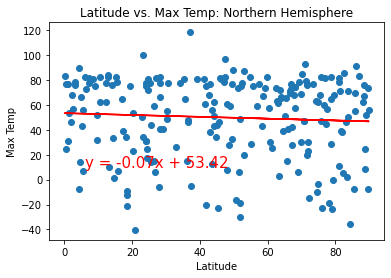

In [18]:
nhlinregress("Latitude", "Max Temp")
print("---------")
print("The first thing I notice about this chart is that within my dataset, there is a noteable bias toward cities with a"
     " maximum temperature in the 40f to 90f range. I'd be interested to investigate why the dataset skews this way. "
     " The correlation between Max Temp and latitude is not as strong as"
     " I expected it to be. I looked into the OpenWeatherData API documentation and realized that the min/max temp value"
     " is calculated for the minimum and maximum temperature in the city at the time the data was called. Due to time"
     " differences, it makes sense that the temperature values do not correlate strongly- we're comparing the temperature"
     " at noon in Indianapolis, Indiana to the temperature at midnight in Augusta, West Australia. Of course it would be"
     " weakly related.")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

This plot visualizes the relationship between the Latitude and Max Temp of only the cities in our dataset which are located in the southern hemisphere.
The correlation coefficient for the Latitude and Max Temp for these cities in the southern hemisphere is 0.055.
There is a weak positive linear relationship between the two values.
----------
Comparing the two charts, I'm struck by how similar they are. Both charts have a fairly even spread of data acrosslatitudes, with temperature values most densely clustered in the 40f-90f degree range. If I were to guess, I'd wagerthat there are just more cities in comfortably inhabitable places- there are significantly more cities in the USAthan in Australia, even though their physical size is similar.


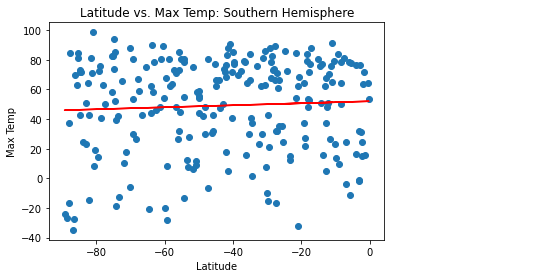

In [19]:
shlinregress("Latitude", "Max Temp")
print("----------")
print("Comparing the two charts, I'm struck by how similar they are. Both charts have a fairly even spread of data across"
      "latitudes, with temperature values most densely clustered in the 40f-90f degree range. If I were to guess, I'd wager"
      "that there are just more cities in comfortably inhabitable places- there are significantly more cities in the USA"
      "than in Australia, even though their physical size is similar.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

This plot visualizes the relationship between the Humidity and Latitude of only the cities in our dataset which are located in the northern hemisphere.
The correlation coefficient for the Humidity and Latitude for these cities is 0.06953.
There is a weak positive linear relationship between the two values.


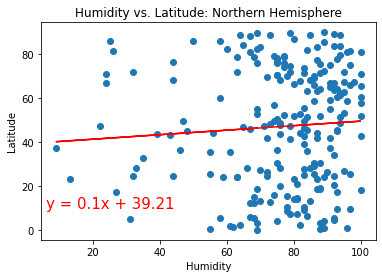

In [20]:
nhlinregress("Humidity", "Latitude")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

This plot visualizes the relationship between the Humidity and Latitude of only the cities in our dataset which are located in the southern hemisphere.
The correlation coefficient for the Humidity and Latitude for these cities in the southern hemisphere is -0.0213.
There is a weak negative relationship between the two values.
----------
Both of these charts, once again, show a positive but weak relationship between the variables. It appears that theworld is rather humid right now, with most datapoints clustered in the 70-100% range.


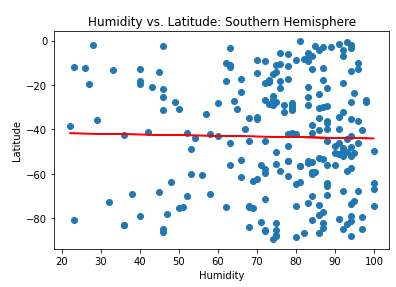

In [21]:
shlinregress("Humidity", "Latitude")
print("----------")
print("Both of these charts, once again, show a positive but weak relationship between the variables. It appears that the"
      "world is rather humid right now, with most datapoints clustered in the 70-100% range.")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

This plot visualizes the relationship between the Cloudiness and Latitude of only the cities in our dataset which are located in the northern hemisphere.
The correlation coefficient for the Cloudiness and Latitude for these cities is -0.00878.
There is a weak negative relationship between the two values.


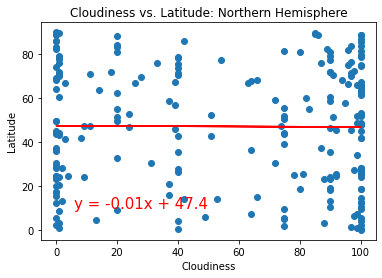

In [22]:
nhlinregress("Cloudiness", "Latitude")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

This plot visualizes the relationship between the Cloudiness and Latitude of only the cities in our dataset which are located in the southern hemisphere.
The correlation coefficient for the Cloudiness and Latitude for these cities in the southern hemisphere is -0.07497.
There is a weak negative relationship between the two values.
----------
It appears that at the time of data collection in both hemispheres, cities are more likely to be cloudless nearthe equator and even more likely to be very cloudy further from the equator.


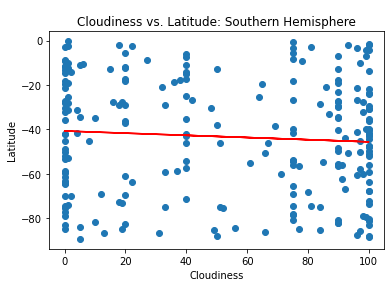

In [23]:
shlinregress("Cloudiness", "Latitude")
print("----------")
print("It appears that at the time of data collection in both hemispheres, cities are more likely to be cloudless near"
      "the equator and even more likely to be very cloudy further from the equator.")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

This plot visualizes the relationship between the Wind Speed and Latitude of only the cities in our dataset which are located in the northern hemisphere.
The correlation coefficient for the Wind Speed and Latitude for these cities is 0.0471.
There is a weak positive linear relationship between the two values.


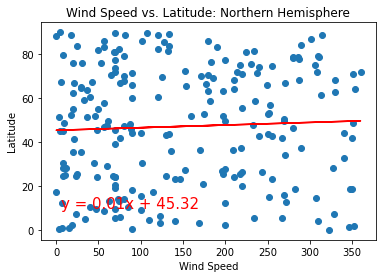

In [24]:
nhlinregress("Wind Speed", "Latitude")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

This plot visualizes the relationship between the Wind Speed and Latitude of only the cities in our dataset which are located in the southern hemisphere.
The correlation coefficient for the Wind Speed and Latitude for these cities in the southern hemisphere is -0.05861.
There is a weak negative relationship between the two values.
----------
In either hemisphere, wind speed appears to have very little correlation to latitude. Given my habitability hypothesis from before, I'm surprised at how evenly datapoints are spread across both charts. My API call was for imperial measurements, so the measurements listed are in miles per hour- if my habitability theory held up, I would expect the datapoints to be clustered far closer to the low end of wind speed. It would be interesting to investigate this further.


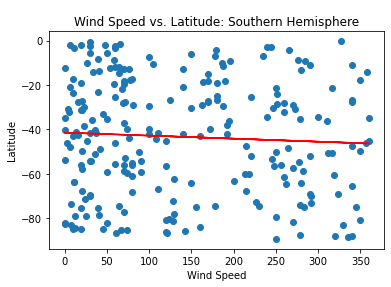

In [25]:
shlinregress("Wind Speed", "Latitude")
print("----------")
print("In either hemisphere, wind speed appears to have very little correlation to latitude. Given my habitability hypothesis"
      " from before, I'm surprised at how evenly datapoints are spread across both charts. My API call was for imperial"
      " measurements, so the measurements listed are in miles per hour- if my habitability theory held up, I would expect"
      " the datapoints to be clustered far closer to the low end of wind speed. It would be interesting to investigate"
      " this further.")